In [3]:
import kwant
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.sparse.linalg as sla
import numpy as np
import tinyarray

sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

def create_sys(mu = 1, delta = 1, stdev = 0.5, a = 1, t = 1.0, W = 1, L = 20, seed = 6):
    lat_e = kwant.lattice.square(a) #defines electron lattice
    lat_h = kwant.lattice.square(a) #defines hole lattice
    sys = kwant.Builder()
    for i in range(L):#itteration horizontally over the system (0 to L-1)
        for j in range(W): #itteration vertically over the system (0 to W-1)
            np.random.seed(seed) #use same disorder/stdev realisations
            mu_i = np.random.randn()*stdev + mu
            
            sys[lat_e(i, j)] = mu_i #electrons have chemical potential mu
            sys[lat_h(i, j)] = -mu_i #holes have chemical potential -mu
#Horizoltal hopping and superconducting
            if i > 0:
                sys[(lat_e(i-1, j), lat_h(i, j))] = delta #electrons moving to holes, equivalent to holes moving to electrons
                sys[(lat_e(i-1, j), lat_e(i, j))] = t #horizontal electron hopping
                sys[(lat_h(i-1, j), lat_h(i, j))] = -t #horizontal hole hopping
#Vertical hopping, 
            if j > 0:
                sys[(lat_e(i, j-1), lat_e(i, j))] = t #vertical electron hopping
                sys[(lat_h(i, j-1), lat_h(i, j))] = -t #vertical hole hopping         
#attaching left lead                
    sym_left_lead = kwant.TranslationalSymmetry((-a, 0))
    left_lead = kwant.Builder(sym_left_lead)
    
    for j in range(W):
        left_lead[lat_e(0, j)] = mu
        left_lead[lat_h(0, j)] = -mu
        if j > 0:
            left_lead[lat_e(0, j), lat_e(0, j - 1)] = t
            left_lead[lat_h(0, j), lat_h(0, j - 1)] = t
        left_lead[lat_e(1, j), lat_e(0, j)] = -t
        left_lead[lat_h(1, j), lat_h(0, j)] = -t
    
    sys.attach_lead(left_lead)
#attaching right lead    
    sym_right_lead = kwant.TranslationalSymmetry((a, 0))
    right_lead = kwant.Builder(sym_right_lead)

    for j in range(W):
        right_lead[lat_e(0, j)] = mu
        right_lead[lat_h(0, j)] = -mu
        if j > 0:
            right_lead[lat_e(0, j), lat_e(0, j - 1)] = t
            right_lead[lat_h(0, j), lat_h(0, j - 1)] = t
        right_lead[lat_e(1, j), lat_e(0, j)] = -t
        right_lead[lat_h(1, j), lat_h(0, j)] = -t

    sys.attach_lead(right_lead)
    
    #kwant.plot(sys)plots system
    return sys
    #sys = sys.finalized() #finalizes system so we can use it for calculations

<IPython.core.display.Javascript object>


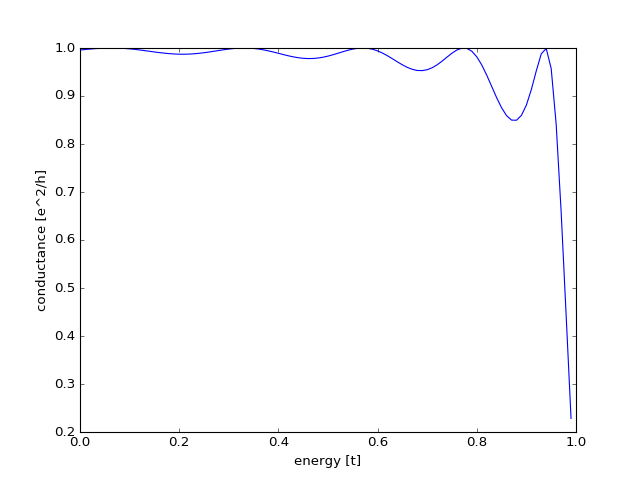

In [4]:
def plot_conductance(sys,energies):
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(sys,energy)
        data.append(smatrix.transmission(1, 0))

    plt.figure()
    plt.plot(energies, data)
    plt.xlabel("energy [t]")
    plt.ylabel("conductance [e^2/h]")
    plt.show()
    
sys = create_sys()
sys = sys.finalized()
plot_conductance(sys, energies=[0.01 * i for i in range(100)])

In [11]:
"""
Figure out how to compute the determinant of the scattering matrix i.e. What inputs does it need? 

Figure out what the correct hamiltonian should be for electrons and for holes
"""